In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import dataframe_image as dfi
import glob
import pycountry

# Shanghai World University Rankings


O Academic Ranking of World Universities (ARWU), também conhecido como Shanghai Ranking, foi o primeiro ranking global de univerisidades baseado em um conjunto de indicadores. Foi criado em 2003 plea Shanghai Jiao Tong University. Desde 2009 vem sendo publicado pela Shanghai Ranking Consultancy, uma consultoria focada em educação superior não vinculada a nenhuma universidade ou agência governamental. Informações a repeito desse ranking podem ser encontradas no seguintes links:

- https://en.wikipedia.org/wiki/Academic_Ranking_of_World_Universities
- https://www.shanghairanking.com/about-arwu



Metodologia para o ranking publicado em 2023:

Para a contrução dos rankings são analisados os fatores:

- Quality of Education (peso 10%): medida pelo número de ex-alunos vencedores de prêmios Nobel e Field Medals;
- Quality of Faculty :
    - Medido pelo número de professores e pesquisadores da universidades vencedores de prêmios Nobel e Field Medals (peso 20%);
    - Outro fator é a presença de pesquisadores com grande número de citações (peso 20%).
- Research Output:
    - Quantidade de artigos publicados na Nature e Science (peso 20%);
    - Número de artigos publicados indexados na Science Citation Index-Expanded e Social Science Citation Index in 2022;
- Per Capita Performance:
    - PErformance per capita da instituição. As métrica citadas acima são divididas pleo número total de professores e pesquisadores na instituição.


Informações a respeito da metodologia podem ser encontradas no seguinte link

- https://www.shanghairanking.com/methodology/arwu/2023









## Carregar Dados


In [25]:
#Link para download dos dados: 

'''
Os dados foram obtidos diretamente da página do Shaghai ranking:

https://www.shanghairanking.com/rankings/arwu/2023

Os dados foram coletados através de web scraping usando a biblioteca selenium. O scrip criado para coletar os dados está disponível neste repositório.
Foram coletados os dados para os anos de 2004 até 2023

'''
path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/Shanghai World University Rankings/web_scraping/'
#Os rankings de cada anos estão salvos em arquivos separados. Os nomes estão no seuinte padrão:
#ranking_20xx.csv


dados={} # as keys dos dicionários serão os anos dos rankings
anos=[str(i) for i in range(2004,2024)] #lista com os nos dos rankings
for ano in anos:
    dados[ano]=pd.read_csv(path+'ranking_'+ano+'.csv')




In [26]:
#Criar um único dataframe com todos os rankings
for ano in anos:
    dados[ano]['Year']=ano #criar coluna com ano do ranking

df_dados=pd.concat(dados,axis=0) #concatenar todos os dados em um único dataframe
df_dados.reset_index(drop=True,inplace=True) #Remover multiindex
df_dados.head()

,World Rank,Institution,Country,Regional Rank,Total Score,Alumni,Award,HiCi,N&S,PUB,PCP,Year
0,1,Harvard University,us,1,100.0,98.6,100.0,100.0,100.0,100.0,60.6,2004
1,2,Stanford University,us,2,77.2,41.2,72.2,96.1,75.2,72.3,68.1,2004
2,3,University of Cambridge,gb,1,76.2,100.0,93.4,56.6,58.5,70.2,73.2,2004
3,4,"University of California, Berkeley",us,3,74.2,70.0,76.0,74.1,75.6,72.7,45.1,2004
4,5,Massachusetts Institute of Technology (MIT),us,4,72.4,74.1,78.9,73.6,69.1,64.6,47.5,2004


## Análise Exploratória

In [27]:
df_dados.info()
#o total score está disponível para as primeiras 100 colocadas de cada ranking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13316 entries, 0 to 13315
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   World Rank     13316 non-null  object 
 1   Institution    13316 non-null  object 
 2   Country        13316 non-null  object 
 3   Regional Rank  13316 non-null  object 
 4   Total Score    2003 non-null   float64
 5   Alumni         13315 non-null  float64
 6   Award          13315 non-null  float64
 7   HiCi           13315 non-null  float64
 8   N&S            13212 non-null  float64
 9   PUB            13315 non-null  float64
 10  PCP            13315 non-null  float64
 11  Year           13316 non-null  object 
dtypes: float64(7), object(5)
memory usage: 1.2+ MB


In [28]:
#Os mesmo fatores foram considerados para os calculos dos rankings desde 2024
df_dados.columns

Index(['World Rank', 'Institution', 'Country', 'Regional Rank', 'Total Score',
       'Alumni', 'Award', 'HiCi', 'N&S', 'PUB', 'PCP', 'Year'],
      dtype='object')

- Colunas no dataframe:
    - World Rank: classificação da universidade no ranking mundial no ano especificado na coluna "Year"
    - Institution: nome da universidades
    - Country: pais de origem da universidade, no formato iso alpha-2
    - Regional Rank: posição da universidade no ranking de seu próprio país
    - Total Score: pontuação geral da universidade considerando todos os fatores da metodologia
    - Alumni : Relacionado a Quality of Education. Mede a quantiade de ex-alunos que receberam premiações.As premiações consideradas são prêmio Nobel em Física,Química, Medicina e Economia e Medalhas Field para a Matemática. ;
    - Award  : Relacionado a Quality of Falculty. Referente a quantidade de profissionais da instituições que receberam premiações. As premiações consideradas são prêmio Nobel em Física,Química, Medicina e Economia e Medalhas Field para a Matemática. 
    - Hi Ci  : Relacionado a Quality of Falculty. Mede o número de pesquisadores com grande número de citações;
    - N&S	 : Relacionado a Research Output. Mede a quantidade de artigos publicado na Nature e Science;
    - PUB    : Relacionado a Research Output. Mede a quantidade de artigos indexados na  Science Citation Index-Expanded e Social Science Citation Index;
    - PCP    : Per Capita Performance. Performance relativa ao tamanho da instituição.
    

### Criar coluna com nomes dos países

Na coluna Country estão os códigos dos países no formato ISO alpha2. Será criada uma nova coluna com o nome dos países por extenso

In [29]:
df_dados['Country_Names']=df_dados["Country"].apply(lambda x : pycountry.countries.get(alpha_2=x).name )

In [30]:
df_dados.head()

,World Rank,Institution,Country,Regional Rank,Total Score,Alumni,Award,HiCi,N&S,PUB,PCP,Year,Country_Names
0,1,Harvard University,us,1,100.0,98.6,100.0,100.0,100.0,100.0,60.6,2004,United States
1,2,Stanford University,us,2,77.2,41.2,72.2,96.1,75.2,72.3,68.1,2004,United States
2,3,University of Cambridge,gb,1,76.2,100.0,93.4,56.6,58.5,70.2,73.2,2004,United Kingdom
3,4,"University of California, Berkeley",us,3,74.2,70.0,76.0,74.1,75.6,72.7,45.1,2004,United States
4,5,Massachusetts Institute of Technology (MIT),us,4,72.4,74.1,78.9,73.6,69.1,64.6,47.5,2004,United States


## Análise dos Rankings 

### Melhores colocadas ao longo dos anos

In [31]:
def create_top_ranking(dados,n_top,coluna_ano="Year",output='Institution'):
    '''
    Função que cria um dataframe em que em cada coluna aparecem as n_top primeiras colocadas no ranking de cada ano. 

    Inputs:
        dados      - Pandas dataframe com  os rankings. Todos os rankings estão em um unico dataframe. O ano do ranking está especificado
                    em uma coluna
        n_top      - (int) Número de universidades que entrarão nos rankings de cada ano 
        coluna_ano - (str) Nome da coluna onde está especificado o ano do ranking
        rank_geral - (str) Nome da coluna onde estão as posições de cada univrsidade nos rankings
        output     - (str) Define a informação contida no dataframe que será retornado. Se output='University' no dataframe
                        retornado estarão os nomes das universidades melhores colocadas. Se output='Country' a informação contida
                        será os países de origem das universidades melhreos colocadas

    Outputs:
        Pandas dataframe com as n_melhores colocadas nos rankings de cada ano. Cada coluna é relativa ao ranking de um ano. As informações 
        nas linhas podem ser os nomes das universidades ous seus países de origem
    '''
    top_list=[]
    anos=dados[coluna_ano].unique() #ano do ranking
    anos.sort()
    for ano in anos: #anos é um lista para selecionar o ranking
        top=dados[dados[coluna_ano]==ano].reset_index().loc[:,[output]] #nos rankings de cada ano as universidades estão ordenadas de acordo com suas posições no rankng gerl
        top.rename(columns={output:str(ano)},inplace=True) #o nome da coluna será o ano do ranking
        top.reset_index(drop=True,inplace=True)
        top=top.iloc[:n_top,:]
        top_list.append(top)
    top_list=pd.concat(top_list,axis=1) #converter a lista em dataframe
    top_list.index=np.arange(1,n_top+1) #alterar index para que comece em 1

    return top_list


A universidade de Harvard é hegêmônica no ranking Shanghai, mantendo a 1° posição em todos os rankings publicados desde 2004.

In [32]:
#10 melhores colocadas nos rankings de cada ano
top_10=create_top_ranking(df_dados,10)
top_10

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University,Harvard University
2,Stanford University,University of Cambridge,University of Cambridge,Stanford University,Stanford University,Stanford University,"University of California, Berkeley",Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University,Stanford University
3,University of Cambridge,Stanford University,Stanford University,"University of California, Berkeley","University of California, Berkeley","University of California, Berkeley",Stanford University,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),"University of California, Berkeley",Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),"University of California, Berkeley",University of Cambridge,University of Cambridge,University of Cambridge,University of Cambridge,University of Cambridge,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT)
4,"University of California, Berkeley","University of California, Berkeley","University of California, Berkeley",University of Cambridge,University of Cambridge,University of Cambridge,Massachusetts Institute of Technology (MIT),"University of California, Berkeley","University of California, Berkeley",Massachusetts Institute of Technology (MIT),University of California-Berkeley,"University of California, Berkeley",University of Cambridge,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),University of Cambridge,University of Cambridge
5,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),University of Cambridge,University of Cambridge,University of Cambridge,University of Cambridge,University of Cambridge,University of Cambridge,Massachusetts Institute of Technology (MIT),"University of California, Berkeley","University of California, Berkeley","University of California, Berkeley","University of California, Berkeley","University of California, Berkeley","University of California, Berkeley","University of California, Berkeley"
6,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,California Institute of Technology,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University,Princeton University
7,Princeton University,Columbia University,Columbia University,Columbia University,Columbia University,Columbia University,Princeton University,Princeton University,Princeton University,Princeton University,California Institute of Technology,California Institute of Technology,University of Oxford,University of Oxford,University of Oxford,University of Oxford,Columbia University,University of Oxford,University of Oxford,University of Oxford
8,Univ

In [33]:
#Contar numero de universidades diferentes que já entraram no top 10 entre 2004 e 2023
#As mesmas universidades oucuparam o top 10 em todos os rankingsentre 2004 e 2023

aparicoes_top10_2004_2023=np.array(top_10)
aparicoes_top10_2004_2023=aparicoes_top10_2004_2023.reshape([-1,1])
aparicoes_top10_2004_2023=pd.DataFrame(aparicoes_top10_2004_2023)
aparicoes_top10_2004_2023=pd.DataFrame(aparicoes_top10_2004_2023.value_counts())
aparicoes_top10_2004_2023.index.names=['Instituição']
aparicoes_top10_2004_2023.rename(columns={'count':'Aparições no top 10 entre 2004 e 2023'})

,Aparições no top 10 entre 2004 e 2023
Instituição,
California Institute of Technology,20
Columbia University,20
Harvard University,20
Massachusetts Institute of Technology (MIT),20
Princeton University,20
Stanford University,20
University of Cambridge,20
University of Oxford,20
University of Chicago,20


### Localização das primeiras colocadas no ranking

##### Top 10

In [34]:
#Localização da 10 universidade melhores colocadas nos rankings de 2011 a 2024
top_10_location=create_top_ranking(df_dados,10,output='Country_Names')
top_10_location

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
2,United States,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
3,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United States,United States
4,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United Kingdom,United States,United States,United States,United States,United States,United Kingdom,United Kingdom
5,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States
6,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
7,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United States,United Kingdom,United Kingdom,United Kingdom
8,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
9,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United States,United States,United States
10,United States,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States


In [35]:
#Número de vezes que cada país apareceu nas dez primeiras posições dos rankings 
#Somente universidades americanas e do Reino Unido no top 10 de todos os rankings

paises_aparicoes_top_10=top_10_location.apply(pd.Series.value_counts)
paises_aparicoes_top_10

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
United States,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
United Kingdom,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [36]:
df_dados.head()

,World Rank,Institution,Country,Regional Rank,Total Score,Alumni,Award,HiCi,N&S,PUB,PCP,Year,Country_Names
0,1,Harvard University,us,1,100.0,98.6,100.0,100.0,100.0,100.0,60.6,2004,United States
1,2,Stanford University,us,2,77.2,41.2,72.2,96.1,75.2,72.3,68.1,2004,United States
2,3,University of Cambridge,gb,1,76.2,100.0,93.4,56.6,58.5,70.2,73.2,2004,United Kingdom
3,4,"University of California, Berkeley",us,3,74.2,70.0,76.0,74.1,75.6,72.7,45.1,2004,United States
4,5,Massachusetts Institute of Technology (MIT),us,4,72.4,74.1,78.9,73.6,69.1,64.6,47.5,2004,United States


In [37]:
#Criação de dataframe formatado para ser incluído no readme


x=df_dados.loc[df_dados["Year"]=='2023',:].reset_index().loc[:9,['World Rank','Institution','Country_Names']].rename(columns={'Institution':'Universidade','Country_Names':'País','World Rank':'Posição no Ranking'})
pos=[str(i)+'°' for i in range(1,11)]
x['Posição no Ranking']=pos
x=x.style.format().hide(axis='index')
path_to_save='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/education_analysis/Shanghai World University Rankings/images/'

dfi.export(x,path_to_save+'top10_2023.png')
x


Posição no Ranking,Universidade,País
1°,Harvard University,United States
2°,Stanford University,United States
3°,Massachusetts Institute of Technology (MIT),United States
4°,University of Cambridge,United Kingdom
5°,"University of California, Berkeley",United States
6°,Princeton University,United States
7°,University of Oxford,United Kingdom
8°,Columbia University,United States
9°,California Institute of Technology,United States
10°,University of Chicago,United States


##### Top 100

In [38]:
#Paises de origem das 100 melhores universidade nos rankings de 2004 a 2023

top_100_location=create_top_ranking(df_dados,100,output='Country_Names')
top_100_location

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
2,United States,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
3,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United States,United States
4,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United Kingdom,United States,United States,United States,United States,United States,United Kingdom,United Kingdom
5,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,United States,United States,France,United States,Germany,Australia,United States,Australia,United States,Israel,Belgium,Canada,Japan,Germany,Singapore,United States,United States,Australia,China,China
97,Japan,Italy,United States,Sweden,Sweden,Denmark,United States,United States,Japan,France,Switzerland,Germany,United States,Australia,Switzerland,United States,Belgium,United States,Hong Kong,United States
98,Sweden,United Kingdom,Japan,United States,United States,Germany,Denmark,United Kingdom,Australia,Australia,United States,Netherlands,United States,United States,United States,United States,Canada,Russian Federation,"Korea, Republic of",United States
99,United States,Sweden,France,Japan,Germany,United States,United States,Japan,United States,United States,United States,United States,Australia,United Kingdom,Germany,Australia,France,United States,United States,Canada


In [39]:
#Número de universidades de cada país no top 100 do ranking de cada ano

paises_aparicoes_top_100=top_100_location.apply(pd.Series.value_counts)
paises_aparicoes_top_100.fillna(value=0,inplace=True)
paises_aparicoes_top_100.sort_values(by='2023',ascending=False,inplace=True)
paises_aparicoes_top_100=paises_aparicoes_top_100.astype('int',copy=True)
paises_aparicoes_top_100

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
United States,51,53,54,54,54,55,54,53,53,52,52,51,50,48,46,45,41,40,39,38
China,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,4,6,7,8,10
United Kingdom,11,11,11,11,11,11,11,10,9,9,8,9,8,9,8,8,8,8,8,8
Australia,2,2,2,2,3,3,3,4,5,5,4,4,6,6,6,7,7,7,7,6
Canada,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5
Switzerland,3,3,3,3,3,3,3,4,4,4,5,4,4,5,5,5,5,5,4,5
Germany,7,5,5,6,6,5,5,5,4,4,4,4,3,4,4,4,4,4,4,4
France,4,4,4,3,3,3,3,3,3,4,4,4,3,3,3,3,5,4,4,4
Israel,1,1,1,1,1,1,1,1,3,3,2,2,2,1,2,1,1,3,3,3
Netherlands,2,2,2,2,2,2,2,2,2,3,4,4,3,4,4,4,4,3,3,3


In [40]:
#número de países diferentes com universidades no top 100 para cada ano

(paises_aparicoes_top_100>0).sum(axis=0)

2004    17
2005    17
2006    15
2007    15
2008    15
2009    15
2010    16
2011    16
2012    16
2013    16
2014    16
2015    16
2016    18
2017    18
2018    18
2019    18
2020    18
2021    18
2022    19
2023    18
dtype: int64

In [41]:
#Plotar mapa mundi com os países coloridos de acordo com o número de universidades no top 100  

ano_selecionado='2023'
paises_top_100_ano_selecionado=paises_aparicoes_top_100.loc[:,[ano_selecionado]] #numero de aparições de universidade de cada pais no top 100 no último ranking publicado (2023)
#Criar coluna com código dos países para possibilitar a plotagem em mapa
codigos=[]
for nome_pais in paises_top_100_ano_selecionado.index:
    try:
        codigos.append(pycountry.countries.get(name=nome_pais).alpha_3)
    except:
        codigos.append(None)
paises_top_100_ano_selecionado['Codigo paises']=codigos
paises_top_100_ano_selecionado.rename(columns={ano_selecionado:"Número de universidades no top 100"},inplace =True)
#paises_top_100_2024.loc['South Korea','Codigo paises']='KOR'
#paises_top_100_2024
paises_top_100_ano_selecionado

,Número de universidades no top 100,Codigo paises
United States,38,USA
China,10,CHN
United Kingdom,8,GBR
Australia,6,AUS
Canada,5,CAN
Switzerland,5,CHE
Germany,4,DEU
France,4,FRA
Israel,3,ISR
Netherlands,3,NLD


In [42]:
#Plotagem dos paises com maiores número de universidade no top 100 no ano de 2024

fig = px.choropleth(paises_top_100_ano_selecionado, locations='Codigo paises', color='Número de universidades no top 100',hover_name=paises_top_100_ano_selecionado.index.to_list(),
            projection='natural earth')
title='Número de universidades por país no top 100 no ranking de '+ano_selecionado  #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'},coloraxis_colorbar_x=0.70) #configuraçoes das margens do mapa, do titulo do gráfico e da posição do colorbar

fig.show()

### Análise dos Fatores Considerados para Construção dos Rankings

In [43]:
df_dados.columns

Index(['World Rank', 'Institution', 'Country', 'Regional Rank', 'Total Score',
       'Alumni', 'Award', 'HiCi', 'N&S', 'PUB', 'PCP', 'Year',
       'Country_Names'],
      dtype='object')

In [44]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13316 entries, 0 to 13315
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   World Rank     13316 non-null  object 
 1   Institution    13316 non-null  object 
 2   Country        13316 non-null  object 
 3   Regional Rank  13316 non-null  object 
 4   Total Score    2003 non-null   float64
 5   Alumni         13315 non-null  float64
 6   Award          13315 non-null  float64
 7   HiCi           13315 non-null  float64
 8   N&S            13212 non-null  float64
 9   PUB            13315 non-null  float64
 10  PCP            13315 non-null  float64
 11  Year           13316 non-null  object 
 12  Country_Names  13316 non-null  object 
dtypes: float64(7), object(6)
memory usage: 1.3+ MB


#### Correlação

Correlação entre 7 fatores:

- Total score 
- Alumni
- Award 
- HiCi 
- N&S	
- PUB   
- PCP


In [45]:
#ranking para o ano de 2023 - ranking mais recente

ranking_2023=dados['2023']

In [46]:
#fatores que serão analisados através da correlação 

fatores_analisados=['Total Score','Alumni','Award','HiCi','N&S','PUB','PCP']

In [47]:
#Calcular a correlação entre os fatores considerados

correlation=ranking_2023.loc[:,fatores_analisados].corr()

Análise da correlação linear da pontuação geral:

- Existe uma correlação positiva muito forte com a quantidade de artigos publicados na Nature e na Science (N&S),com a quantidade de professores que já receberam premiações (Awards) e com a quantidade de ex-alunos que já receberam premiações (Alumni). Ou seja, a pontuação de uma instituição está fortemente correlacionada com a qualidade da pesquisa produzida, medida pelo número de publicações nas duas revistas científicas de maior prestígio, pela qualidade da educação fornecida, medido pelo sucesso dos ex-alunos, e pela qualidade dos professores e pesquisadores da instituição, medida pelas premiações ;
- Existe uma correlação positiva forte com HiCi e com PCP. O primeiro fator mede a presença de pesquisadores com grande número de citações e o segundo a produtividade da instituição.

Alguns pontos interessantes verificados no cálculo da correlação linear:

- A qualidade da educação, medida pelas premiações obtidas por ex-alunos (Alumni), tem as maiores correlações com Award e N&S, que são fatores relacionados respectivamente a qualidade dos membros (pesquisadores e professores) da instituição, medida pelas premiações recebidas, e a qualidade da pesquisa produzida, medida pelo número de publicações na revistas Science e Nature;

- O indicador Award tem correlação positiva forte com a quantidade de artigos publicados na Science e na Nature, mas correlação positiva muito fraca com PUB. Provavelmene os pesquisadores premiados direcionam a publicações de seus trabalhos  para as revistas Science e Nature;
- HiCi tem correlação positiva forte com N&S. Artigos na melhores revistas tendem a receber grande quantidade de citações.


<Axes: >

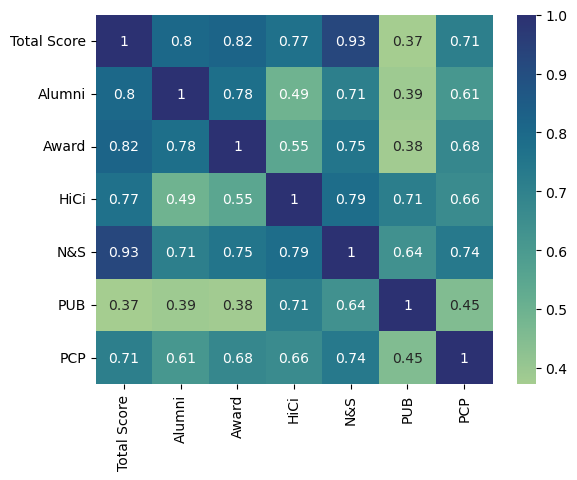

In [48]:
#plotar correlação entre os  fatores considerados usando seaborn

import matplotlib.pyplot as plt
sns.heatmap(correlation, annot=True,cmap="crest")


In [49]:
##plotar correlação entre os seis fatores considerados usando plotly

fig = px.imshow(correlation,text_auto=True,color_continuous_scale='RdBu_r')
fig.show()

### Construção de rankings baseados em outros fatores

Função para criação de ranking de acordo com um dos seguintes indicadores:
 
 - Alumni
 - Award
 - Hi Ci
 - N&S
 - PUB   
 - PCP



In [50]:
def ranking_fator_selecinado(dados,ano,fator,n_posicoes,overall_ranking='World Rank',
                             coluna_ano='Year',name_universities='Institution',location='Country_Names',include_values=False):
    '''
    Função para gerar uma ranking para o fator desejado

    Inputs:
        dados             - Pandas dataframe com os rankings para os anos entre 2005 e 2018
        ano               - (int) ano selecionado para o qual o ranking será criado. Deve ser um ano no intervalo [2005,2018].
        fator             - (str) nome do fator considerado na contrucao do ranking. Fatores aceitos são: 'Alumni',
                                  'Award','HiCi','N&S','PUB' e 'PCP'
        n_posicoes        - (int) número de posições no ranking gerado. Serão incluídas desde a posição 1 até n_posicões
        overall_ranking   - (str) nome da coluna do dataframe dados que contem a posição das universidade no ranking geral
        name_universities - (str) nome da coluna do dataframe dados que contem o nome das universidade
        location          - (str) nome da coluna no dataframe com os paises de origem das universidades
        coluna_ano        - (str) nome da coluna com o ano do ranking
        include_values    - (boolean) Se True o dataframe gerado conterá uma coluna com o fator selecionado.Caso False os
                            valores do fator selecionado para cada universidade não serão incluídos
    Output:
        Pandas coluna com três colunas: uma delas com as universidades ordenadas de acordo com o fator selecionado, uma com a 
        posição da universidade no ranking geral e outra com os paises de origem das universidades. Caso include values=True
        é adicionada uma quarta coluna com os valores fator selecionado

    '''
    #if ano not in np.arange(2005,2019,1):
    #    raise Exception('Os rankings estão disponíveis para os anos de 2005 a 2018')

    #if fator not in ['Alumni','Award','Hi Ci','N&S','PUB','PCP']:
    #    raise Exception('Fator selecionador deve ser um dos seguintes: Alumni, Award, Hi Ci , N&S , PUB , PCP')
    dados=dados.loc[dados[coluna_ano]==ano,:] #selecionar o ano
    dados_ordenados=dados.sort_values(by=fator,ascending=False).reset_index(drop=True) #ordenar os valores de acordo com o fator selecionado
    if include_values:
        dados_ordenados=dados_ordenados.loc[:(n_posicoes-1),[overall_ranking,name_universities,fator,location]] 
    else:
        dados_ordenados=dados_ordenados.loc[:(n_posicoes-1),[overall_ranking,name_universities,location]] 
    dados_ordenados.rename(columns={overall_ranking:'Ranking Geral',location:'Location',name_universities:'Top '+str(n_posicoes)+' '+fator},inplace=True)
    dados_ordenados.index=np.arange(1,n_posicoes+1) #criando novo index para iniciar com valor 1
    return dados_ordenados

In [51]:
#Exemplo: 20 melhores universidades de acordo com o número de pesquisadores com grande número de citações

ranking_2023_award=ranking_fator_selecinado(df_dados,'2023','HiCi',20,include_values=False)
ranking_2023_award

,Ranking Geral,Top 20 HiCi,Location
1,1,Harvard University,United States
2,2,Stanford University,United States
3,22,Tsinghua University,China
4,3,Massachusetts Institute of Technology (MIT),United States
5,19,"University of California, San Diego",United States
6,5,"University of California, Berkeley",United States
7,14,University of Pennsylvania,United States
8,7,University of Oxford,United Kingdom
9,16,Johns Hopkins University,United States
10,8,Columbia University,United States


Função para criação de um dataframe com universidades em cada coluna rankeadas de acordo com os seguintes fatores:

 - Overall
 - Alumni
 - Award
 - Hi Ci
 - N&S
 - PUB   
 - PCP

In [52]:
def ranking_grupo_fatores(dados,ano,n_posicoes,fatores,coluna_names='Institution',coluna_ano='Year',overall_ranking='World Rank'):
    """
    Função para criação de um dataframe com 6 colunas, em cala uma delas as universidade aparecem rankeadas de acordo com um fator especificado.
        

    Inputs:
        dados        - Pandas dataframe com os rankings para todos os anos entre 2005 e 2018
        ano          - (str) Ano em que o dataframe foi publicado.Deve ser um valor entre 2004 e 2023
        n_posicoes   - (int) Número de posições que aparecerão no ranking
        fatores      - (list) Lista com o nome dos fatores (strings) que serão usados na construção dos rankings
        coluna_names - (str) Nome da coluna com o nome das universidades
        coluna_ano   - (str) Nome da coluna onde estão os anos em que os rankings foram publicados
        overall_ranking - (str) Nome da coluna com o ranking geral

    Outpout:
        Pandas dataframe no qual em cada coluna as universidades aparecem rankeadas de acordo com um fator
    """
    #nome das colunas do dataframe original que serão usadas para criação dos rankings
    dados_ano_selecionado=dados.loc[dados[coluna_ano]==ano,:] #seleção dos dados para o ano especificado

   
    #if ano not in np.arange(2005,2019,1):
    #    raise Exception('Os rankings estão disponíveis para os anos de 2005 a 2018')
    
    ranking_fatores=[]
    for fator in fatores:
            if fator==overall_ranking:
                dados_fator=dados_ano_selecionado.reset_index(drop=True) #os dados vem ordenados de acordo com a posição geral das universidades, não é necessário ordená-los
                dados_fator=dados_fator.loc[:n_posicoes-1,[coluna_names]] #selecionar o número de posições desejadas
                dados_fator.rename(columns={coluna_names:'Ranking '+'Geral'},inplace=True) #alterar o nome da coluna. Não segue o padrão das
                                                                                    #demais em que é só adicionar Ranking ao nome do fator 
            else:
            #nos fatores a ordenação deve ser do maior para o menor (nos fatores os valores são para as pontuações)
                dados_fator=dados_ano_selecionado.sort_values(by=fator,ascending=False).reset_index(drop=True)
                dados_fator=dados_fator.loc[:n_posicoes-1,[coluna_names]]
                dados_fator.rename(columns={coluna_names:'Ranking '+fator},inplace=True)
            ranking_fatores.append(dados_fator)
    ranking_fatores=pd.concat(ranking_fatores,axis=1)
    ranking_fatores.index=np.arange(1,n_posicoes+1)
    
    return ranking_fatores


In [53]:
#Exemplo: Top 20 para o ano de 2023

fatores=['World Rank','Alumni','Award','HiCi','N&S','PUB','PCP']


top_20_2023=ranking_grupo_fatores(df_dados,'2023',20,fatores)
top_20_2023

,Ranking Geral,Ranking Alumni,Ranking Award,Ranking HiCi,Ranking N&S,Ranking PUB,Ranking PCP
1,Harvard University,Harvard University,Princeton University,Harvard University,Harvard University,Harvard University,California Institute of Technology
2,Stanford University,University of Cambridge,Harvard University,Stanford University,Stanford University,Zhejiang University,Harvard University
3,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology (MIT),University of Cambridge,Tsinghua University,Massachusetts Institute of Technology (MIT),Shanghai Jiao Tong University,Princeton University
4,University of Cambridge,"University of California, Berkeley",Stanford University,Massachusetts Institute of Technology (MIT),"University of California, Berkeley",Peking University,Massachusetts Institute of Technology (MIT)
5,"University of California, Berkeley",Princeton University,University of Chicago,"University of California, San Diego",University of Cambridge,Sun Yat-sen University,University of Cambridge
6,Princeton University,Columbia University,Massachusetts Institute of Technology (MIT),"University of California, Berkeley",University of Oxford,University of Toronto,Stanford University
7,University of Oxford,University of Chicago,"University of California, Berkeley",University of Pennsylvania,California Institute of Technology,Tsinghua University,"University of California, Berkeley"
8,Columbia University,California Institute of Technology,Paris-Saclay University,University of Oxford,Cornell University,Central South University,Karolinska Institute
9,California Institute of Technology,PSL University,California Institute of Technology,Johns Hopkins University,"University of California, San Francisco",University College London,The University of Texas M. D. Anderson Cancer ...
10,University of Chicago,Yale University,Columbia University,Columbia University,ETH Zurich,Fudan University,Swiss Federal Institute of Technology Lausanne


## Universidades Brasileiras

In [54]:
#dataframe somente com as universidades brasileiras

df_universidades_brasileiras=df_dados[df_dados["Country_Names"]=="Brazil"].loc[:,['Institution','Year','World Rank']]
df_universidades_brasileiras.reset_index(drop=True,inplace=True)
df_universidades_brasileiras

,Institution,Year,World Rank
0,University of Sao Paulo,2004,153-201
1,Federal University of Rio de Janeiro,2004,302-403
2,State University of Campinas,2004,302-403
3,Sao Paulo State University,2004,404-502
4,University of Sao Paulo,2005,101-152
...,...,...,...
208,Fluminense Federal University,2023,801-900
209,Federal University of Ceara,2023,901-1000
210,Federal University of Goiás,2023,901-1000
211,Federal University of Pernambuco,2023,901-1000


### Número de universidades brasileiras nos rankings de cada ano

In [55]:
#Número de universidades brasileiras que entraram no ranking
#Dataframe com o número total de universidades no ranking de cada ano e quantas dessas são brasileiras

num_brasileiras={'Ano':[],
                'Total Universidades':[],
                'Universidades Brasileiras':[]}
for ano in df_dados["Year"].unique():
    num_brasileiras['Ano']+=[ano]
    num_brasileiras['Total Universidades']+=[len(df_dados[df_dados['Year']==ano])]
    try:
        num_brasileiras['Universidades Brasileiras']+=[len(df_universidades_brasileiras[df_universidades_brasileiras['Year']==ano])]
    except:
        num_brasileiras['Universidades Brasileiras']+=[0]

num_brasileiras=pd.DataFrame.from_dict(num_brasileiras)
num_brasileiras

                

,Ano,Total Universidades,Universidades Brasileiras
0,2004,502,4
1,2005,500,4
2,2006,500,4
3,2007,510,5
4,2008,503,6
5,2009,501,6
6,2010,500,6
7,2011,500,7
8,2012,500,6
9,2013,500,6


### Universidades brasileiras melhores colocadas

In [56]:
#Criação de dataframe com as 3 universidades brasileiras melhores colocadas em cada ranking

top_3_brasileiras={}
for ano in df_universidades_brasileiras["Year"].unique():
    top_3_brasileiras[str(ano)]=df_universidades_brasileiras[df_universidades_brasileiras['Year']==ano].iloc[:3,0].reset_index(drop=True)

In [57]:
top_3_brasileiras=pd.DataFrame.from_dict(top_3_brasileiras)
top_3_brasileiras.index=[1,2,3]
top_3_brasileiras

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo,University of Sao Paulo
2,Federal University of Rio de Janeiro,State University of Campinas,Federal University of Rio de Janeiro,State University of Campinas,State University of Campinas,State University of Campinas,State University of Campinas,State University of Campinas,State University of Campinas,Federal University of Minas Gerais,Federal University of Minas Gerais,Federal University of Rio de Janeiro,Federal University of Minas Gerais,Federal University of Rio de Janeiro,Federal University of Rio de Janeiro,Federal University of Rio de Janeiro,UNESP,Federal University of Rio Grande do Sul,University of Campinas,UNESP
3,State University of Campinas,Federal University of Rio de Janeiro,State University of Campinas,Federal University of Rio de Janeiro,Federal University of Minas Gerais,Federal University of Minas Gerais,Federal University of Minas Gerais,Federal University of Minas Gerais,Federal University of Minas Gerais,Federal University of Rio de Janeiro,Federal University of Rio de Janeiro,UNESP,Federal University of Rio de Janeiro,UNESP,UNESP,UNESP,University of Campinas,UNESP,Federal University of Minas Gerais,Federal University of Minas Gerais


In [58]:
#Posições da 3 brasileiras melhores colocada no ranking geral
#Até o momento nenhuma universidade brasileira entrou no top 100 do ranking Shanghai

melhores_posicoes_universidades_brasileiras={}
for ano in df_universidades_brasileiras["Year"].unique():
    melhores_posicoes_universidades_brasileiras[str(ano)]=df_universidades_brasileiras[df_universidades_brasileiras['Year']==ano].iloc[:3,2].reset_index(drop=True)

melhores_posicoes_universidades_brasileiras=pd.DataFrame.from_dict(melhores_posicoes_universidades_brasileiras)
melhores_posicoes_universidades_brasileiras.index=[1,2,3]
melhores_posicoes_universidades_brasileiras

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,153-201,101-152,102-150,102-150,101-151,101-151,101-150,102-150,101-150,101-150,101-150,101-150,101-150,151-200,151-200,101-150,101-150,101-150,101-150,101-150
2,302-403,203-300,301-400,203-304,201-302,201-302,201-300,201-300,201-300,301-400,301-400,301-400,301-400,301-400,301-400,301-400,301-400,301-400,301-400,301-400
3,302-403,301-400,301-400,305-402,303-401,303-401,301-400,301-400,301-400,301-400,301-400,301-400,301-400,301-400,301-400,301-400,301-400,301-400,401-500,401-500


In [59]:
'''
Unicamp aparece com dois nomes diferentes nos dados:
University of Campinas
State University of Campinas

Alterando o nome para padronizar o nome da Unicamp
'''
df_dados.replace('State University of Campinas','University of Campinas',inplace=True)

In [60]:
df_universidades_brasileiras.columns

Index(['Institution', 'Year', 'World Rank'], dtype='object')

In [70]:
#Criação de dataframe com as 10 universidade brasileiras melhores colocadasno ranking de 2024
#Dataframe será usado no readme do projeto

'''
path_to_save='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/education_analysis/Shanghai World University Rankings/images/'
x=df_universidades_brasileiras.loc[df_universidades_brasileiras['Year']=='2023',:]
x=x.rename(columns={'World Rank':'Posição no Ranking','Institution':'Universidade'})
x=x.iloc[:10,:]
x.drop(columns='Year',inplace=True)
x=x.style.format().hide(axis='index')
dfi.export(x,path_to_save+'top_brasileiras.png')
x
'''

Universidade,Posição no Ranking
University of Sao Paulo,101-150
UNESP,301-400
Federal University of Minas Gerais,401-500
Federal University of Rio Grande do Sul,401-500
University of Campinas,401-500
Federal University of Rio de Janeiro,501-600
Federal University of Parana,701-800
Federal University of Santa Catarina,701-800
Federal University of Sao Paulo,701-800
University of Brasília,701-800


### USP e Unicamp

#### Comparativo com as 10 melhores colocadas


In [35]:
#Comparativo para o ano de 2023 - último ranking publicado até o momento


colunas_comparativo=['Institution','Country_Names','World Rank','Alumni', 'Award', 'HiCi', 'N&S', 'PUB', 'PCP'] #colunas_comparativo são as colunas que serão usadas no comparativo
ranking_2023=df_dados.loc[df_dados["Year"]=='2023',colunas_comparativo] #somente o ranking de 2023
filtro=((ranking_2023['Institution']=='University of Sao Paulo') | (ranking_2023['Institution']=='University of Campinas')) #filtro para selecionar somente USP e Unicamp
usp_unicamp=ranking_2023.loc[filtro,:] #dados para usp e unicamp
top10_2023=ranking_2023.iloc[:9,:] #10 melhores colocadas



In [36]:
#Universidades no top 10 no ano de 2023
top10_2023


,Institution,Country_Names,World Rank,Alumni,Award,HiCi,N&S,PUB,PCP
12316,Harvard University,United States,1,100.0,92.6,100.0,100.0,100.0,86.7
12317,Stanford University,United States,2,45.6,88.1,73.6,82.8,67.5,58.0
12318,Massachusetts Institute of Technology (MIT),United States,3,72.5,81.1,54.7,71.8,55.0,73.8
12319,University of Cambridge,United Kingdom,4,78.9,90.8,45.1,61.0,63.6,60.4
12320,"University of California, Berkeley",United States,5,65.8,76.5,52.6,64.3,53.1,57.3
12321,Princeton University,United States,6,61.7,100.0,32.9,50.4,39.4,76.7
12322,University of Oxford,United Kingdom,7,49.9,59.7,51.4,57.6,71.4,48.5
12323,Columbia University,United States,8,58.5,60.9,47.0,52.3,63.1,32.1
12324,California Institute of Technology,United States,9,56.1,63.4,28.7,57.3,37.6,100.0


In [37]:
#dados para Usp e Unicamp para 2024
usp_unicamp

,Institution,Country_Names,World Rank,Alumni,Award,HiCi,N&S,PUB,PCP
12460,University of Sao Paulo,Brazil,101-150,0.0,0.0,18.6,14.7,67.8,17.3
12778,University of Campinas,Brazil,401-500,0.0,0.0,6.6,5.9,38.4,17.0


In [38]:
#Criação deum dataframe com os valores de certos indicadores para Usp e Unicamp bem como dos valores máximos, mínimos, média e mediana desses mesmos indicadores para as universidades
#no top 10
comparativo_usp_unicamp_top10={'Alumni':[],'Award':[],'HiCi':[], #Dicionário que será convertido em dataframe com os indicadores selecionados
            'N&S':[],'PUB':[],'PCP':[]}
for key in comparativo_usp_unicamp_top10.keys():
    comparativo_usp_unicamp_top10[key]+=[usp_unicamp.loc[usp_unicamp['Institution']=='University of Sao Paulo',key].item()] #dados para usp
    comparativo_usp_unicamp_top10[key]+=[usp_unicamp.loc[usp_unicamp['Institution']=='University of Campinas',key].item()]  #dados para unicamp
    comparativo_usp_unicamp_top10[key]+=[top10_2023.loc[:,key].max().item()] #maximo dentre universidades no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2023.loc[:,key].min().item()] #mínimo dentre universidade no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2023.loc[:,key].mean().item()] #média dentre universidade no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2023.loc[:,key].median().item()] #mediana dentre universidades no top 10

comparativo_usp_unicamp_top10=pd.DataFrame.from_dict(comparativo_usp_unicamp_top10)
index_comparativo=['USP','Unicamp','Máximo Top 10','Mínimo Top 10', 'Média Top 10', 'Mediana Top 10'] #nome do index
comparativo_usp_unicamp_top10.index=index_comparativo
pd.options.display.float_format = '{:,.2f}'.format #mostrar os ddos no dataframe com somente dois algarismos depois da virgula
comparativo_usp_unicamp_top10


,Alumni,Award,HiCi,N&S,PUB,PCP
USP,0.00,0.00,18.60,14.70,67.80,17.30
Unicamp,0.00,0.00,6.60,5.90,38.40,17.00
Máximo Top 10,100.00,100.00,100.00,100.00,100.00,100.00
Mínimo Top 10,45.60,59.70,28.70,50.40,37.60,32.10
Média Top 10,65.44,79.23,54.00,66.39,61.19,65.94
Mediana Top 10,61.70,81.10,51.40,61.00,63.10,60.40


#### Evolução de indicadores da USP e da Unicamp


In [39]:
#Indicadores que serão analisados
indicadores=['Year','Alumni', 'Award',
                     'HiCi', 'N&S', 'PUB', 'PCP'] #colunas_comparativo são as colunas que serão usadas no comparativo


In [40]:
#criação de um dataframe com os dados da unicamp
unicamp=df_dados[(df_dados['Institution']=='University of Campinas')].loc[:,indicadores].reset_index(drop=True).sort_values(by='Year')
unicamp

,Year,Alumni,Award,HiCi,N&S,PUB,PCP
0,2004,0.00,0.00,8.70,6.40,37.90,11.80
1,2005,0.00,0.00,7.90,6.20,40.60,17.80
2,2006,0.00,0.00,7.70,4.10,41.00,19.10
3,2007,0.00,0.00,7.40,4.10,42.00,19.30
4,2008,0.00,0.00,7.30,6.30,41.80,14.30
5,2009,0.00,0.00,7.30,6.90,41.20,19.50
6,2010,0.00,0.00,7.20,7.80,44.30,19.90
7,2011,0.00,0.00,7.20,7.90,43.10,20.50
8,2012,0.00,0.00,7.20,8.00,42.00,18.70
9,2013,0.00,0.00,7.20,5.40,42.40,19.90


In [41]:
#criação de um dataframe com os dados da usp

usp=df_dados[(df_dados['Institution']=='University of Sao Paulo')].loc[:,indicadores].reset_index(drop=True).sort_values(by='Year')
usp

,Year,Alumni,Award,HiCi,N&S,PUB,PCP
0,2004,0.00,0.00,8.70,11.70,63.60,18.70
1,2005,0.00,0.00,11.10,11.00,63.50,27.80
2,2006,0.00,0.00,10.90,11.50,64.20,30.20
3,2007,0.00,0.00,10.50,13.10,65.30,30.40
4,2008,0.00,0.00,10.30,12.70,69.00,32.70
5,2009,0.00,0.00,10.30,12.60,69.30,32.70
6,2010,0.00,0.00,10.20,13.30,76.30,15.40
7,2011,0.00,0.00,10.20,12.50,73.70,14.60
8,2012,0.00,0.00,10.20,10.80,72.80,14.90
9,2013,0.00,0.00,10.20,11.60,72.70,14.70


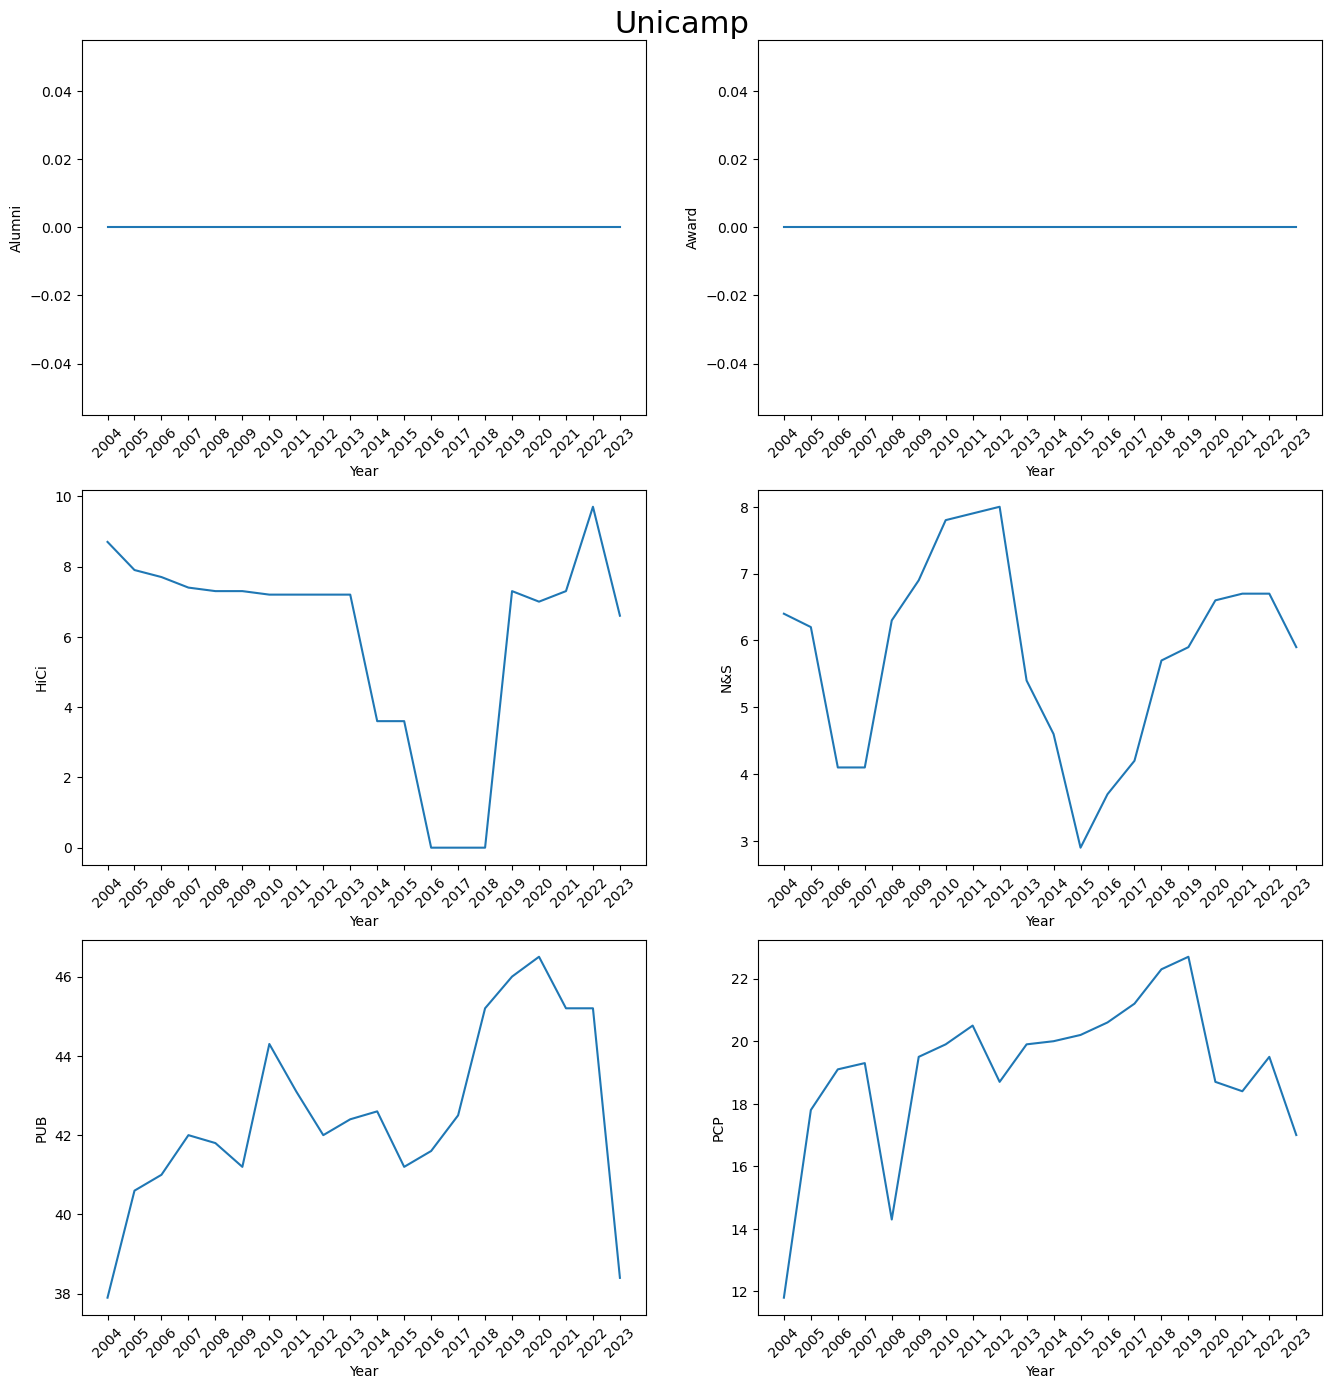

In [51]:
#Plotagem da evolução dos indicadores da Unicamp

ncols=2
nrows=3
index_indicador=1
fig,axs=plt.subplots(ncols=ncols,sharex=False,nrows=nrows,figsize=(16,15))
fig.suptitle('Unicamp', fontsize=22) #adiciona um título geral para os subplots
plt.subplots_adjust(top=0.96) #controla a distância entre o título geral dos subplots e os primeiros gráficos

for row in range(nrows):
    for col in range(ncols):
        sns.lineplot(data=unicamp,x='Year',y=indicadores[index_indicador],ax=axs[row,col])
        axs[row,col].tick_params('x', labelrotation=45) 
        index_indicador+=1
#axs[3,0].tick_params('x', labelrotation=45) 


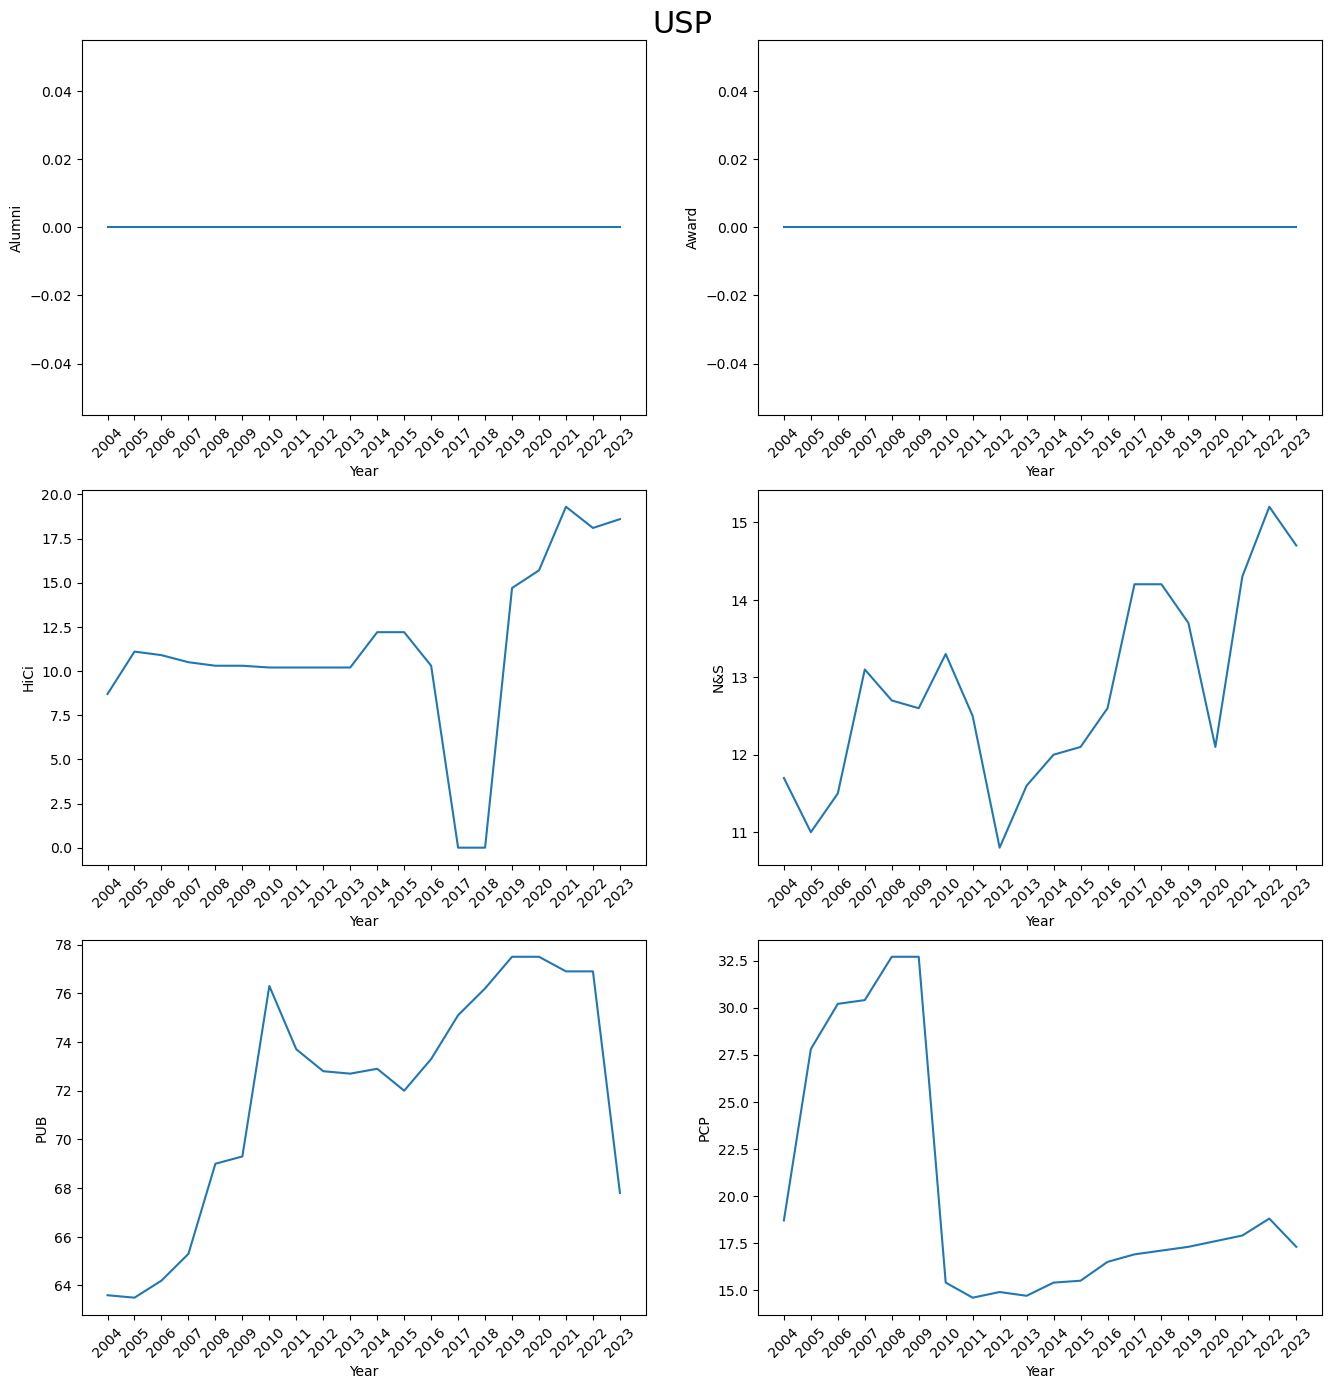

In [52]:
#Plotagem da evolução dos indicadores da Usp

ncols=2
nrows=3
index_indicador=1
fig,axs=plt.subplots(ncols=ncols,sharex=False,nrows=nrows,figsize=(16,15))
fig.suptitle('USP', fontsize=22) #adiciona um título geral para os subplots
plt.subplots_adjust(top=0.96) #controla a distância entre o título geral dos subplots e os primeiros gráficos

for row in range(nrows):
    for col in range(ncols):
        sns.lineplot(data=usp,x='Year',y=indicadores[index_indicador],ax=axs[row,col])
        axs[row,col].tick_params('x', labelrotation=45) 
        index_indicador+=1
#axs[3,0].tick_params('x', labelrotation=45) 

In [42]:
#Salvar dataframe para ser usado no comparativo

path_to_save='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/Comparativo/Rankings/'

df_dados.to_csv(path_to_save+'ranking_Shanghai.csv',index=False)